# Jean pockets

Are women jean pockets ridiculously small? Let's look at the data!

The file `jean-pocket-measurements.csv` shows pocket measurements for 20 popular brands.
Four pairs of jeans from each brand were measured: men's and women's skinny and straight styles. All jeans were designated a 32-inch waistband. 

The following measurements are included:
- `height_front`: maximum front pocket height (cm)
- `height_back`: maximum back pocket height (cm)
- `width_front`: maximum front pocket width (cm)
- `width_back`: maximum back pocket width (cm)

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'jean-pocket-measurements.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
df = pd.read_csv('jean-pocket-measurements.csv')
df.head()

,brand,style,gender,height_front,width_front,height_back,width_back
0,3fe5003e,skinny,women,14.5,16.5,15.0,13.7
1,3fe5003e,straight,women,14.5,16.0,15.5,13.0
2,790c6eab,skinny,women,13.0,14.5,15.5,13.5
3,790c6eab,straight,women,13.0,14.5,14.5,13.0
4,26aaf627,skinny,women,13.0,14.0,14.0,14.2


### Project Ideas

- What is the average difference in pocket `height_front` between women's and men's jeans?

- Is there a significant difference in pocket `height_front` between skinny and straight styles within the same gender?

- How do back pocket sizes compare between women's and men's jeans?

- Measure your phone's height. What percentage of women's and men's jeans can comfortably fit your phone in the pockets?



In [2]:
# YOUR CODE HERE (add more cells as needed)

# Calculate the difference in average height of the front pocket between
means = df.groupby('gender')['height_front'].mean()
difference_women_and_men = round(means['men'] - means['women'], 4)

# Calculate diffenreces between skinny and straight styles
means_style = df.groupby(['gender', 'style'])['height_front'].mean()
men_height_front_diffrence = means_style['men']['skinny'] - means_style['men']['straight']
women_height_front_diffrence = means_style['women']['skinny'] - means_style['women']['straight']


# Print the results
print(f'Difference height of the front pocket: {difference_women_and_men} cms')
print(f'Difference in styles men: {men_height_front_diffrence} cms')
print(f'Difference in styles women: {women_height_front_diffrence} cms')




Difference height of the front pocket: 8.8025 cms
Difference in styles men: 0.10999999999999943 cms
Difference in styles women: -0.11500000000000021 cms


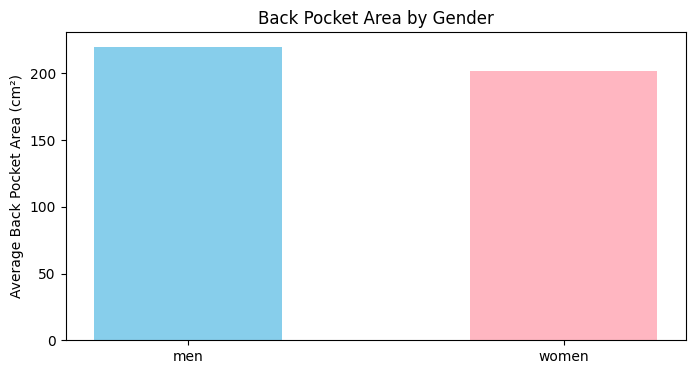

In [3]:
import matplotlib.pyplot as plt
df['back_pocket_area'] = df['height_back'] * df['width_back']
back_pockets = df.groupby('gender')[['height_back', 'width_back', 'back_pocket_area']].mean().reset_index()
plt.figure(figsize=(8, 4))
plt.bar(back_pockets['gender'], back_pockets['back_pocket_area'], color=['skyblue', 'lightpink'], width=0.5)
plt.ylabel('Average Back Pocket Area (cm²)')
plt.title('Back Pocket Area by Gender')
plt.show()


In [72]:
IPHONE_13_HEIGHT = 14.68  # cm
# Amount of people per gender
people_per_gender = df['gender'].value_counts().reset_index()
people_per_gender.columns = ['gender', 'count']


# Calculate the number of iPhone 13s that fit in the back pocket per group
total_back_pocket_per_gender = df.query('height_back >= @IPHONE_13_HEIGHT or height_front >= @IPHONE_13_HEIGHT')['gender'].value_counts().reset_index()
total_back_pocket_per_gender.columns = ['gender', 'total_back_pocket']


# Merge the two DataFrames
merged_df = pd.merge(people_per_gender, total_back_pocket_per_gender)
merged_df['Pocket_Porcentage'] = merged_df['total_back_pocket'] / merged_df['count'] * 100
merged_df


,gender,count,total_back_pocket,Pocket_Porcentage
0,women,40,31,77.5
1,men,40,40,100.0


In [88]:
# Another version to response this
IPHONE_13_HEIGHT = 14.68  # cm

# Count gender
people_per_gender2 = df['gender'].value_counts()

# Count how many people can fit an iPhone 13 in their back pocket
can_fit_iphone = df[(df['height_back'] >= IPHONE_13_HEIGHT) | (df['height_front'] >= IPHONE_13_HEIGHT)]['gender'].value_counts()


# Merge the two Series into a DataFrame
merged_df2 = pd.DataFrame({
    'count': people_per_gender2,
    'total_back_pocket': can_fit_iphone
}).fillna(0)

merged_df2['Pocket_Percentage'] = merged_df2['total_back_pocket'] / merged_df2['count'] * 100
merged_df2 = merged_df2.reset_index().rename(columns={'index': 'gender'})
merged_df2

,gender,count,total_back_pocket,Pocket_Percentage
0,men,40,40,100.0
1,women,40,31,77.5
